# An Introduction to Convolutional Neural Networks (CNNs)


## What is a Convolutional Neural Network (CNN)?
A Convolutional Neural Network (CNN), also known as ConvNet, is a specialized type of deep learning algorithm mainly designed for tasks that necessitate object recognition, including image classification, detection, and segmentation. CNNs are employed in a variety of practical scenarios, such as autonomous vehicles, security camera systems, and others.

## The importance of CNNs
There are several reasons why CNNs are important in the modern world, as highlighted below:

CNNs are distinguished from classic machine learning algorithms such as [SVMs](https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python) and [decision trees](https://www.datacamp.com/tutorial/decision-tree-classification-python) by their ability to autonomously extract features at a large scale, bypassing the need for manual feature engineering and thereby enhancing efficiency.

The convolutional layers grant CNNs their translation-invariant characteristics, empowering them to identify and extract patterns and features from data irrespective of variations in position, orientation, scale, or translation.

A variety of pre-trained CNN architectures, including VGG-16, ResNet50, Inceptionv3, and EfficientNet, have demonstrated top-tier performance. These models can be adapted to new tasks with relatively little data through a process known as fine-tuning. Beyond image classification tasks, CNNs are versatile and can be applied to a range of other domains, such as natural language processing, time series analysis, and speech recognition.

## Inspiration Behind CNN and Parallels With The Human Visual System

Convolutional neural networks were inspired by the layered architecture of the human visual cortex, and below are some key similarities and differences:


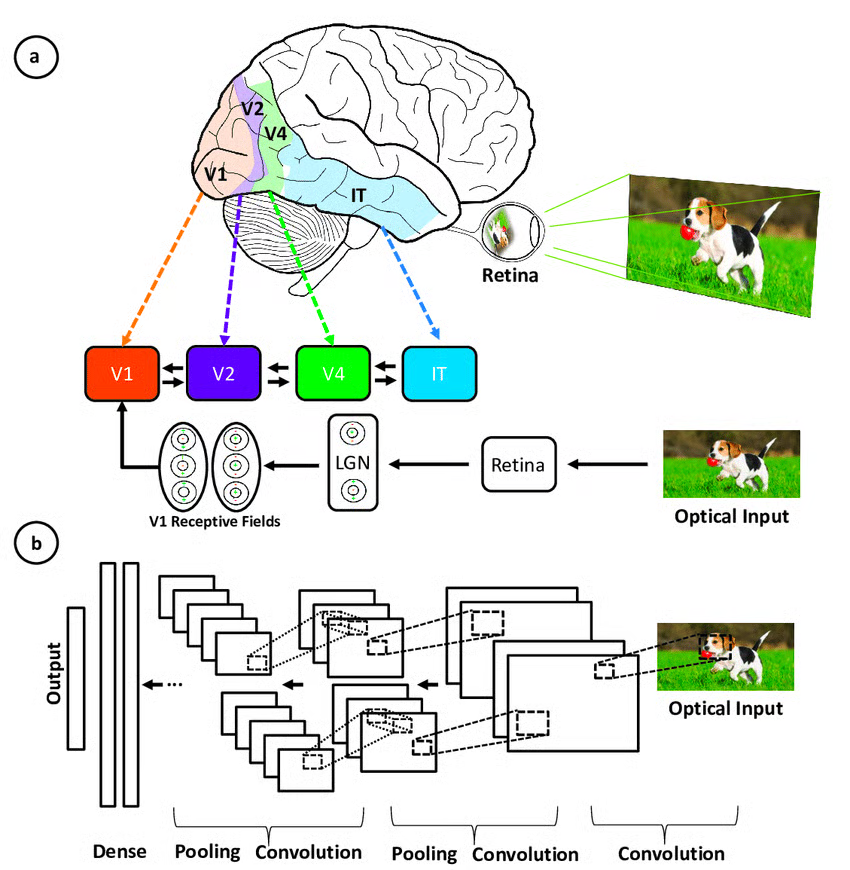

## Key Components of a CNN
The convolutional neural network is made of four main parts.

But how do CNNs Learn with those parts?

They help the CNNs mimic how the human brain operates to recognize patterns and features in images:

* Convolutional layers
* Rectified Linear Unit (ReLU for short)
* Pooling layers
* Fully connected layers

This section dives into the definition of each one of these components through the example of the following example of classification of a handwritten digit.
CNN.avif



# Convolutional layers
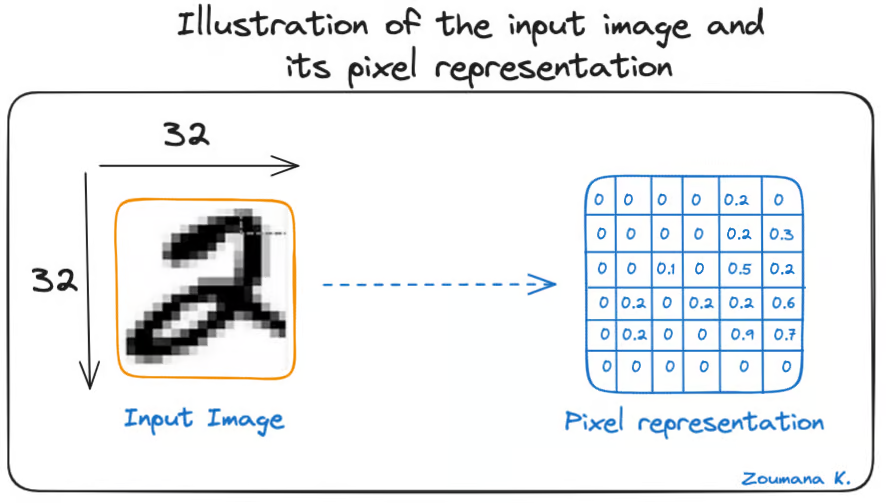


# Padding and Stride

The term describes how many pixels a CNN kernel adds to an image during processing. If you set the padding in a CNN to zero, every added pixel value will be zero. If you set the zero padding to one, a one-pixel border with a zero value will surround the image.

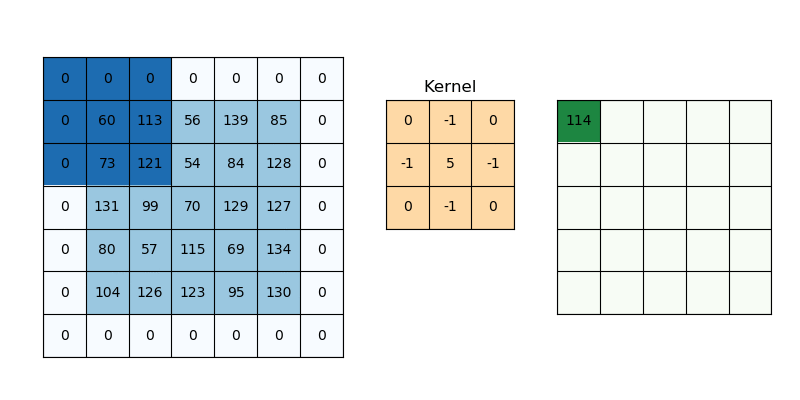

Padding works by increasing the processing region of a convolutional neural network. The kernel is a neural network filter that moves through a picture, scanning each pixel and turning the data into a smaller or bigger format. You add padding to the image frame to help the kernel process the image by providing more room for it to cover the image. padding to a CNN-processed image provides for more accurate image analysis.



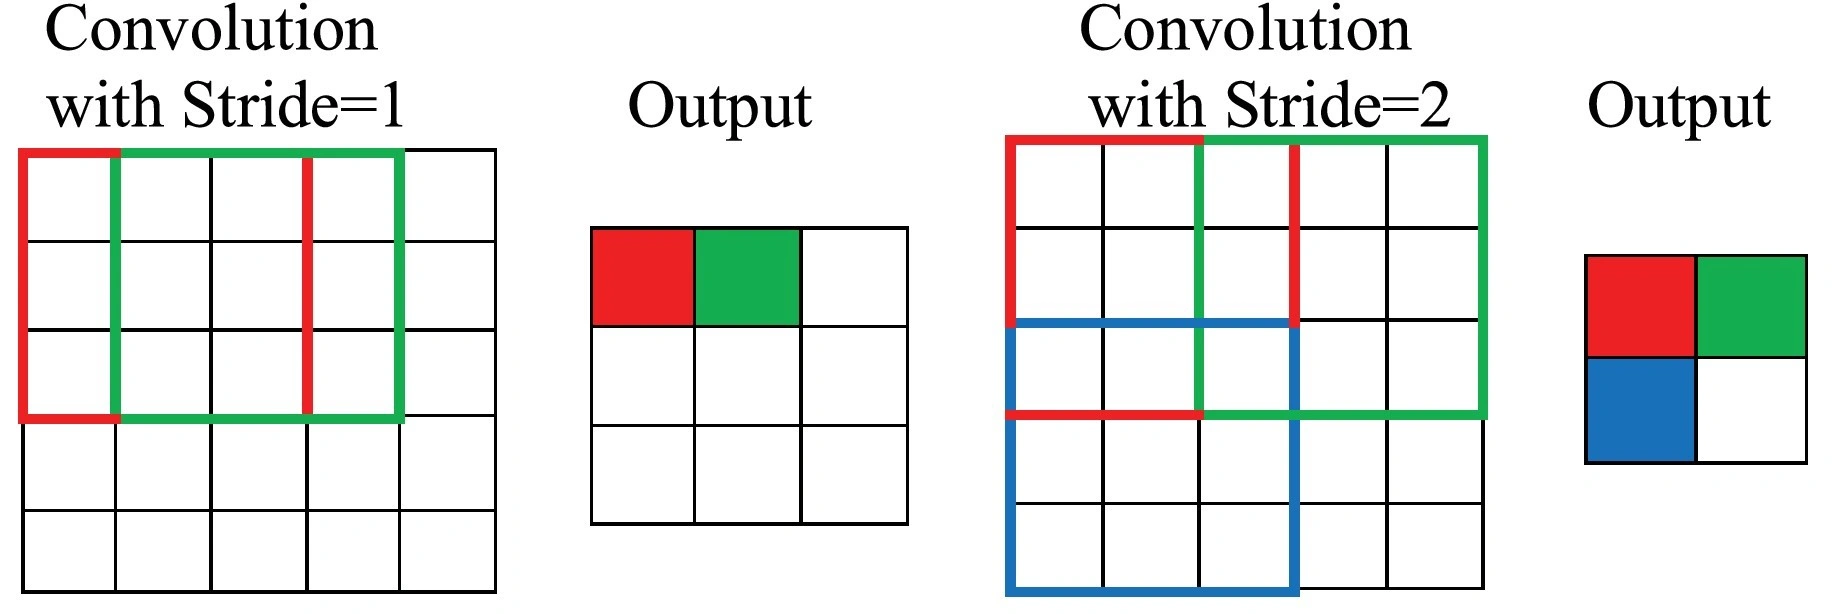

# Pooling

Its purpose is to gradually shrink the representation’s spatial size to reduce the number of parameters and computations in the network. The pooling layer treats each feature map separately.

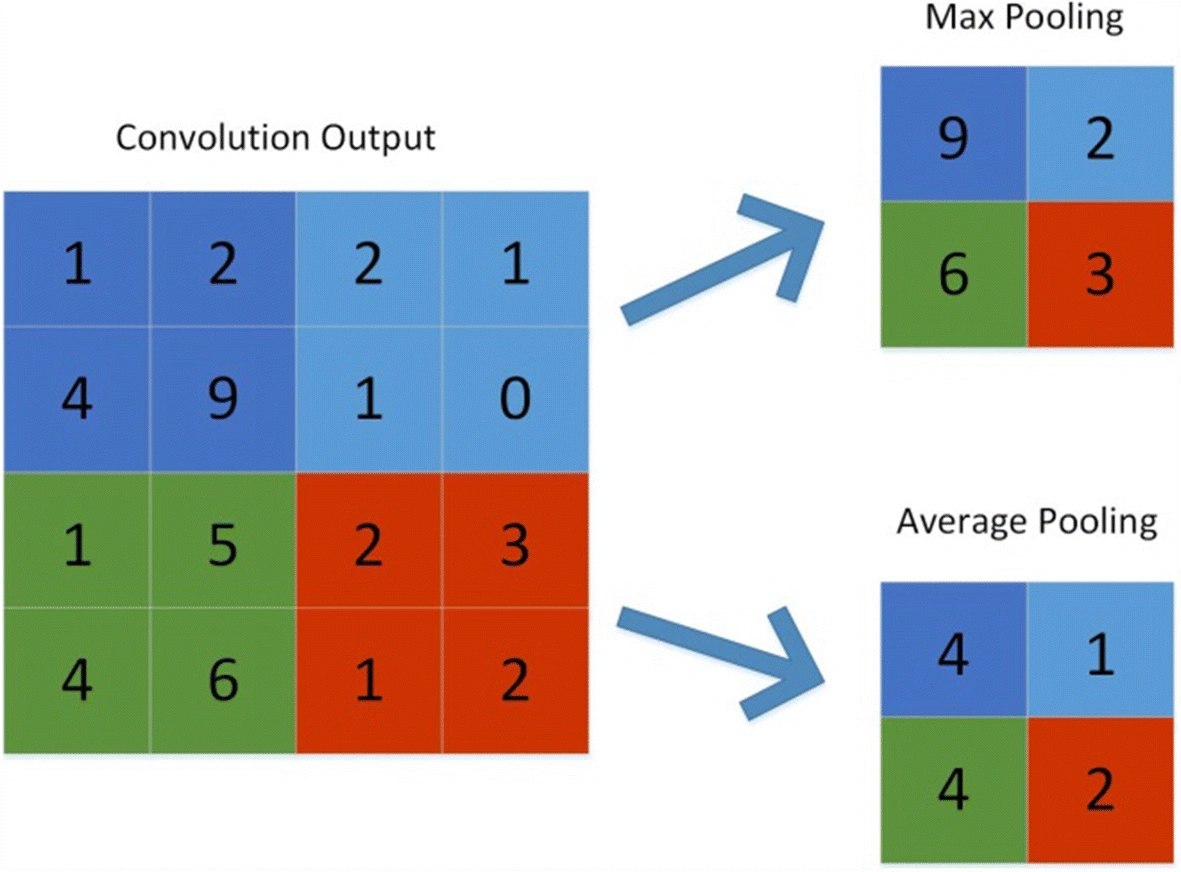

The following are some methods for pooling:

* Max-pooling: It chooses the most significant element from the feature map. The feature map’s significant features are stored in the resulting max-pooled layer. It is the most popular method since it produces the best outcomes.

* Average pooling: It entails calculating the average for each region of the feature map. Pooling gradually reduces the spatial dimension of the representation to reduce the number of parameters and computations in the network, as well as to prevent overfitting. If there is no pooling, the output has the same resolution as the input.

# Building a Convolutional Neural Network(CNN)

https://poloclub.github.io/cnn-explainer/#article-pooling ---> Best Visualization Behind the Scene

In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor

print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


In [29]:
train_data = torchvision.datasets.FashionMNIST(root='data',
                                               train = True,
                                               download=True,
                                               transform=ToTensor(),
                                               target_transform=None)
test_data = torchvision.datasets.FashionMNIST(root='data',
                                              train=False,
                                              download=False,
                                              transform=ToTensor(),
                                              )

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 265kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.95MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.4MB/s]


In [30]:
image, label = test_data[0]

In [35]:
classes = test_data.classes

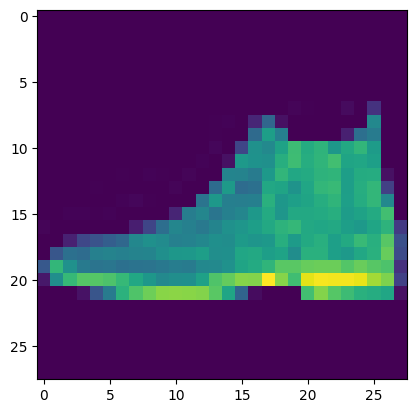

In [33]:
import matplotlib.pyplot as plt

plt.imshow(image.squeeze())

In [89]:
class FashionMNISTModel(nn.Module):
  def __init__(self, input_shape : int, output_shape : int, hidden_units : int):
    super().__init__()
    self.conv_block1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2))

    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2))

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,# ---> manual
                  out_features=output_shape),
    )

  def forward(self,x):
    x = self.conv_block1(x)
    print(f"output shape of conv block1:{x.shape}")
    x = self.conv_block2(x)
    print(f"output shape of conv block2:{x.shape}")
    x = self.classifier(x)
    print(f"output shape of classifier:{x.shape}")
    return x




In [82]:
torch.manual_seed(42)


image = torch.randn(size=(32, 3, 64, 64))
test_image = image[0]
print(test_image.shape)
print(image.shape)


torch.Size([3, 64, 64])
torch.Size([32, 3, 64, 64])


Let's create an example `nn.Conv2d()` with various parameters:
* `in_channels` (int) - Number of channels in the input image.
* `out_channels` (int) - Number of channels produced by the convolution.
* `kernel_size` (int or tuple) - Size of the convolving kernel/filter.
* `stride` (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.
* `padding` (int, tuple, str) - Padding added to all four sides of input. Default: 0.

![example of going through the different parameters of a Conv2d layer](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-conv2d-layer.gif)

*Example of what happens when you change the hyperparameters of a `nn.Conv2d()` layer.*

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:

torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)

conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

# Max pooling

In [ ]:
max_pooling = nn.MaxPool2d(kernel_size=2)


max_pooling_conv = max_pooling(conv_output)
print("before max pooling:",conv_output.shape)
print("max pooling:",max_pooling_conv.shape)


before max pooling: torch.Size([1, 10, 62, 62])
max pooling: torch.Size([1, 10, 31, 31])


In [76]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [90]:
torch.manual_seed(42)

model = FashionMNISTModel(input_shape=1, output_shape=len(classes),hidden_units=10).to(device)

In [73]:
image.shape

torch.Size([1, 28, 28])

In [91]:
rand_image = torch.randn(size=(1, 28, 28))
rand_image.shape

torch.Size([1, 28, 28])

In [92]:
model(rand_image.unsqueeze(dim=1).to(device))

output shape of conv block1:torch.Size([1, 10, 14, 14])
output shape of conv block2:torch.Size([1, 10, 7, 7])
output shape of classifier:torch.Size([1, 10])


tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)